# OpenCv 
- it is a computer vision library concerned about getting insights out of media files (images and videos)

## Table of Contents
<ul>
<li><a href="#read">Read and display images</a></li>
<li><a href="#resize">Resize and Rescale</a></li>
<li><a href="#draw">Draw and Write on images</a></li>
<li><a href="#essential">essential functions</a></li>
<li><a href="#transform">Image Transformation</a></li>
<li><a href="#contour">Contour detection</a></li>
</ul>

In [1]:
import cv2 as cv

In [2]:
# pip install caer
# help to speed up the workflow 

<a id='read'></a>
##  Read and display images

In [3]:
#read the image
cat = cv.imread('images/cat.jpg')

In [4]:
#display the image by user function interface 
def display(image,title,secondImage = None, secondtitle= None):
    cv.imshow(title, image)
    if secondImage is not None and secondtitle is not None:
        cv.imshow(secondtitle,secondImage)
    cv.waitKey(0) #keyboard bound function, when we pass 0 it wait infinite amount of time for a key to be pressed

In [5]:
display(cat,'Cat')

In [6]:
# read a large image 
large_img = cv.imread('images/large.jpg')
display(large_img,'Large')

- openCv doesnt have a built-in way to deal with images larger than the size of the monitor
    - there are ways that will be discussed

### Reading Videos
- cv.Videocapter()
    - takes an int or path to video
        - integer in case of camera or webcame connected to the computer 
            - in this case 0 usually means the webcam
            - if we have multiple cameras connected use different integers 
- read() keeps reading frame from a capture pointer, everytime it returns wiher the frame was successfully read and the frame itself

In [7]:
capture = cv.VideoCapture('Videos/Dog - 15305.mp4') #capture is instance of the videocapture class that contains the video given

In [8]:
while True:
    isTrue,frame = capture.read() #read frame by frame
    cv.imshow('Video', frame) #Display each frame
    
    if cv.waitKey(20) & 0xFF == ord('q'): #break if the letter q is pressed and wait for it 20 millesecond -make sure-
        break
capture.release() #relesase the capture pointer 
cv.destroyAllWindows() #and destroy all windows

- once its done the video ends, it stops and we get an error 
    - -215 assertion failed
    - that means the openCv couldn't find a media file at that location 
    - because the video ran out of frames so it broke of the loop by error or we actually specified a wrong path

<a id='resize'></a>
## Resize and resale images and videos

- we usually do that to prevent computational strain and processing  
- rescaling will red of some of the information of an image 
- works for images, videos and even live video

In [9]:
def rescaleFrame(frame,scale=0.75):
    width = int(frame.shape[1] * scale) #calculate the new width
    height = int(frame.shape[0] * scale) #calculate the new height
    dimensions = (width,height) #store them into a tuple
    
    return cv.resize(frame,dimensions, interpolation=cv.INTER_AREA) #resize the frame to a particular dimension and return the resized frame

In [10]:
# apply the function on videos 
capture = cv.VideoCapture('Videos/Dog - 15305.mp4') #capture is instance of the videocapture class that contains the video given

while True:
    isTrue,frame = capture.read() 
    frame_resized = rescaleFrame(frame,0.25)
    
    cv.imshow('Video', frame) 
    cv.imshow('Resized Video',frame_resized)
    if cv.waitKey(20) & 0xFF == ord('q'): 
        break
capture.release()  
cv.destroyAllWindows() 

In [11]:
# apply it on a single image 
rescaleFrame(large_img)

array([[[253, 254, 254],
        [252, 254, 254],
        [249, 254, 253],
        ...,
        [ 57, 120, 147],
        [ 79, 140, 155],
        [ 85, 145, 153]],

       [[251, 255, 255],
        [251, 255, 255],
        [250, 255, 255],
        ...,
        [ 42,  99, 125],
        [  3,  50,  66],
        [ 15,  62,  70]],

       [[248, 255, 254],
        [248, 255, 255],
        [249, 255, 254],
        ...,
        [ 65, 116, 144],
        [  0,  35,  52],
        [ 33,  65,  74]],

       ...,

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 46,  54,  54],
        [ 44,  52,  52],
        [ 43,  51,  51]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 41,  49,  49],
        [ 38,  46,  46],
        [ 40,  48,  48]],

       [[ 23,  22,  22],
        [ 23,  22,  22],
        [ 23,  22,  22],
        ...,
        [ 42,  50,  50],
        [ 39,  47,  47],
        [ 41,  49,  49]]

In [12]:
display(rescaleFrame(large_img,0.25),'resized image')

#### another method of resizing
- only works for live videos 
- using the capture.set()
    - takes integer as first parameter 
        - 3 refrences the width
        - 4 refrences the height 
        - 10 refrences the brightness
    - takes the new width or height 

In [13]:
def changeresolution(width,height):
    capture.set(4,width)
    capture.set(3,height)

In [14]:
def rescale(frame,scale=0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width,height)
    return dimensions

In [15]:
capture = cv.VideoCapture(0)
while True:
    isTrue,frame = capture.read() #read frame by frame
    width,height = rescale(frame,0.8)
    changeresolution(width,height)
    cv.imshow('Video', frame) #Display each frame
    
    if cv.waitKey(20) & 0xFF == ord('q'): #break if the letter q is pressed and wait for it 20 millesecond -make sure-
        break
capture.release() #relesase the capture pointer 
cv.destroyAllWindows() #and destroy all windows

<a id='draw'></a>
## Draw and Write on images
- we have 2 ways
    - drawing on existing image 
    - create a blank image to draw on

In [16]:
import numpy as np

In [17]:
display(cat,'cat')

In [18]:
blank_img = np.ones((500,500,3), dtype='uint8')
blank_img *= 255
display(blank_img,'Blanck')

In [19]:
# paint the blank image (wither white or black) to be green 
blank_img[:] = 0,255,0
display(blank_img,'Green image')

In [20]:
blank_img[200:300 ,300:400] = 0xFF,0x99,0x33
display(blank_img,title="portion of the image colored")

#### Draw a rectangle

In [21]:
blank_img = np.ones((500,500,3), dtype='uint8')
cv.rectangle(blank_img,(0,0),(250,500),(255,0,0),thickness = 2)
display(blank_img,'rectangle')

- to fill the rectangle use thickness = cv.FILLED OR thickness = -1

In [22]:
blank_img = np.ones((500,500,3), dtype='uint8')
cv.rectangle(blank_img,(0,0),(blank_img.shape[1]//2,blank_img.shape[0]//2),(255,0,0),thickness = -1)
display(blank_img,'rectangle')

for more check the video

In [23]:
cv.line(blank_img,(0,0),(blank_img.shape[1]//2,blank_img.shape[0]//2),(255,255,255),thickness = 3)
display(blank_img,'with line')

#### write text on an images 

In [24]:
cv.putText(blank_img,'Hello',(255,255), cv.FONT_ITALIC,1.0,(255,255,255),2)
display(blank_img,'with text added')

<a id='essential'></a>
## Essential functions 

### Convert to grey scale
- we read images as bgr 
- we use cv.cvtColor(image to be converted, colorCode)
    - convert to grey scale where we only see the intensity distribution of pixels rather than the color itself  

In [25]:
large_img_grey = cv.cvtColor(large_img,cv.COLOR_BGR2GRAY)
display(large_img_grey,'gray')

In [26]:
water_drop = cv.imread('images/dropofwater.jpg')
display(water_drop,'Water Drop')

In [27]:
water_drop_grey = cv.cvtColor(water_drop,cv.COLOR_BGR2GRAY)
display(water_drop_grey,'gray water drop')

### Blur an image 
- we usually apply slight blur to reduce some of the noises 
- there are alot of blurring techs but now we will use a guassian blue 
    - takes the image 
    - kernel size -odd number-

In [28]:
buildings_img = cv.imread('images/building.jpg')
display(buildings_img,title='biuldings')

In [29]:
buildings_blurred = cv.GaussianBlur(buildings_img,(3,3),cv.BORDER_DEFAULT)
display(buildings_blurred,'blurred buildings')

### Edge cascade 
- try to find the edges that are present in the image
- there are many that are available 
    - canny, it's a multistep algorithm
        - takes the image and 2 threshold values
- edges = cv.Canny(gray,low_threshold,high_threshold) 
     - takes an image called gray and the output will be another image called edges 
     - low and high thresholds determine how strong the edges must be to be detected 
         - strength can be defined as the difference in adacent pixels -strength of the gradient-

In this case, you are applying Canny to the image gray and your output will be another image called edges. low_threshold and high_threshold are your thresholds for edge detection.

The algorithm will first detect strong edge (strong gradient) pixels above the high_threshold, and reject pixels below the low_threshold. Next, pixels with values between the low_threshold and high_threshold will be included as long as they are connected to strong edges. The output edges is a binary image with white pixels tracing out the detected edges and black everywhere else. See the OpenCV Canny Docs for more details.

What would make sense as a reasonable range for these parameters? In our case, converting to grayscale has left us with an 8-bit image, so each pixel can take 2^8 = 256 possible values. Hence, the pixel values range from 0 to 255.

This range implies that derivatives (essentially, the value differences from pixel to pixel) will be on the scale of tens or hundreds. So, a reasonable range for your threshold parameters would also be in the tens to hundreds.

As far as a ratio of low_threshold to high_threshold, John Canny himself recommended a low to high ratio of 1:2 or 1:3.

We'll also include Gaussian smoothing, before running Canny, which is essentially a way of suppressing noise and spurious gradients by averaging (check out the OpenCV docs for GaussianBlur). cv2.Canny() actually applies Gaussian smoothing internally, but we include it here because you can get a different result by applying further smoothing (and it's not a changeable parameter within cv2.Canny()!).

You can choose the kernel_size for Gaussian smoothing to be any odd number. A larger kernel_size implies averaging, or smoothing, over a larger area. The example in the previous lesson was kernel_size = 3.

In [30]:
buildings_canny = cv.Canny(buildings_img,125,175)
display(buildings_img,'normal image')
display(buildings_canny,'edges people')

##### if we passed the blurred image to be edge detected, we will reduce the edges

In [31]:
buildings_blurred = cv.GaussianBlur(buildings_img,(3,3),cv.BORDER_DEFAULT)
display(buildings_blurred,'blurred')

In [32]:
buildings_canny_blurred = cv.Canny(buildings_blurred,125,175)
cv.imshow('normal image',buildings_img)
cv.imshow('edges of normal image',buildings_canny)
cv.imshow('edges of blurred image',buildings_canny_blurred)
cv.waitKey(0)

-1

### Dilation of an image 
- cv.dilate(SE -i guess he means the image- ,kernelSize,iterations)
- we will use the edges as a SE

In [33]:
dilated = cv.dilate(buildings_canny_blurred,(3,3),1)
cv.imshow('normal edges',buildings_canny_blurred)
cv.imshow('dilated edges',dilated)
cv.waitKey(0)

-1

### Erosion

In [34]:
eroded = cv.erode(dilated,(3,3),1)
cv.imshow('normal image before erosion',dilated)
cv.imshow('eroded image',eroded)
cv.waitKey(0)

-1

##### Another example

In [35]:
morph_img = cv.imread('images/morphology.png')
morph_img = cv.cvtColor(morph_img,cv.COLOR_BGR2GRAY)
display(morph_img,'normal image')

In [36]:
eroded_image_3 = cv.erode(morph_img,(3,3),1)
eroded_image_5 = cv.erode(morph_img,(11,11),2)
cv.imshow('original image',morph_img)
cv.imshow('eroded image',eroded_image_5)
cv.imshow('difference',eroded_image_5-eroded_image_3)
cv.waitKey(0)

-1

### resize
- cv.resize(image to be resized, destination size,interpolation)
    - ignoring the aspect ratio
    - interpolation set to inter-area if we are shrinking the image
    - we will probably use INTER_CUBIC OR INTER_LINEAR when we make the image larger
        - CUBIC IS THE SLOWEST BUT HIGHER QUALITY

In [37]:
resized = cv.resize(large_img,(500,500),interpolation=cv.INTER_AREA)
display(resized,'resized image')

In [38]:
resized_cat = cv.resize(cat,(500,500),interpolation=cv.INTER_CUBIC)
display(resized_cat,'resized')

### Cropping

In [39]:
cropped_img = large_img[500:700,300:400]
display(cropped_img,'')

<a id='transform'></a>
## Image Transformations 

### translation
- shifting the image by some point (x,y)

In [40]:
buildings_img = cv.imread('images/building.jpg')

In [41]:
def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]]) #translation matrix
    dimensions = (img.shape[1],img.shape[0])
    return cv.warpAffine(img,transMat,dimensions)

# -x ---> left 
# x  ----> right and so on 

In [42]:
transated_img = translate(buildings_img,108,180)
display(transated_img,'translated image')

### Rotation
- rotating the image by some angle around some point 
    - usually we rotate around the center but it can be any point
- we need 2 functions to do that
    - getRotationmatrix2d(point to rotate around, angle of rotation,scale if we will scale the image while rotating) 
        - it returns the rotation matrix
    - cv.warpAffine(image, rotation matrix, dimensions)

In [43]:
def rotate(img,angle,rotPoint=None):
    (height,width) = img.shape[:2]
    
    if rotPoint is None:
        rotPoint = (width//2,height//2) #we assume the default is the center 
    rotMat = cv.getRotationMatrix2D(rotPoint,angle,scale = 1.0)
    dimensions = (width,height)
    
    return cv.warpAffine(img,rotMat, dimensions)

In [44]:
rotated = rotate(buildings_img,-45)
display(rotated,'rotated image')

### Resizing

In [45]:
resized = cv.resize(buildings_img,(500,500),cv.INTER_AREA)
display(resized,'resized')

### Flipping
- cv.flip(image to be flipped, flipcode)
    - flopcode could be 
        - 0, flips the image vertically 
        - 1, horizontally or over y axis
        - -1, both vertically and horizontally

In [46]:
flipped = cv.flip(buildings_img,0)
display(flipped,'flipped vertically')

In [47]:
hor_flipped = cv.flip(buildings_img,1)
display(buildings_img,'normal image',hor_flipped,'flipped image')

### Cropping

In [48]:
cropped_img = buildings_blurred[200:300,150:200]
display(cropped_img,'cropped image')

<a id='contour'></a>
## Contour detection
- identify contours in openCv
- countours are the boundaries of objects
    - lines or curves that joins the continous points along the boundaries of objects 
    - not the same as edges mathematically 
    - useful in detection and recognition and shape analysis
- use cv.findcontours(edges, mode in which to find the contours, contour approximation method)
    - the mode is either 
        - cv.RETR_TREE returns all the hierarchal contours, all the contours in the hierarchal systems
        - RETR_EXTERNAL if we want only the external contours 
        - RETR_LIST if we want all the contours in the image
    - the method is for now cv.CHAIN_APPROX_NONE, the method means how do we want to approximate the contours 
        - NONE does nothing 
        - SIMPLE compresses the contours returned in simple one that makes more sense  
            - for example it return in the line contours the 2 end points only as they make the most sense 
- the function looks at the SE or edges and returns 2 values 
    - contours: python list of all the coordinates of the contours found in the image 
    - hierarchies: the hierarchal representation of the contours 

### Visualize the contours by drawing on the image
- cv.drawcontours(image to draw over,contours list, contour index -how many contours do you want to draw,color,thickness)
    - contour index -1 to draw all of them 

In [49]:
from matplotlib import pyplot as plt
import pylab #Just to control the figure size 
pylab.rcParams['figure.figsize'] = [10.,8.]
%matplotlib inline 

In [50]:
def show_image(image, title='image', cmap_type='gray'):
    plt.imshow(image ,cmap = cmap_type)
    plt.title(title)
    plt.axis('off') #we dont want axises 

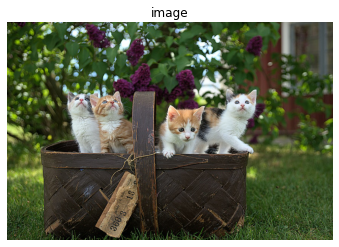

In [51]:
cats = plt.imread('images/cats2.jpg')
show_image(cats)

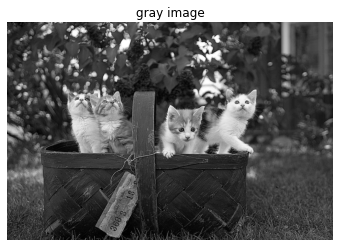

In [52]:
gray_cats = cv.cvtColor(cats,cv.COLOR_BGR2GRAY)
show_image(gray_cats,'gray image',cmap_type='gray')

In [53]:
cats_canny = cv.Canny(cats,125,175)
display(cats_canny,'canny edges')

In [54]:
contours_canny , hierarchies = cv.findContours(cats_canny,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
print("the number of contour(s) are {}".format(len(contours_canny)))

the number of contour(s) are 4958


this is huge

In [55]:
contours_canny , hierarchies = cv.findContours(cats_canny,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print("the number of contour(s) are {}".format(len(contours_canny)))

the number of contour(s) are 4958


looks like there isn't much to be compressed

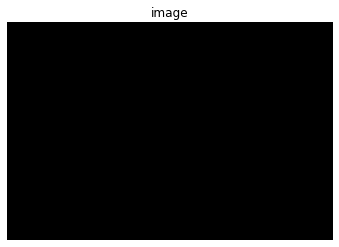

In [56]:
blank_img = np.zeros(cats.shape[:2],dtype='uint8')
show_image(blank_img)

In [57]:
cv.drawContours(blank_img,contours_canny,-1,(255,255,255),1)
display(blank_img,'contours drawn of canny',cats_canny,'canny edges')

In [58]:
blurred_cats = cv.GaussianBlur(gray_cats,(5,5),cv.BORDER_DEFAULT)
display(blurred_cats,'')

In [59]:
blurred_edges = cv.Canny(blurred_cats,125,175)

In [60]:
contours_blurred_edges , hierarchies = cv.findContours(blurred_edges,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print("the number of contour(s) are {}".format(len(contours_blurred_edges)))

the number of contour(s) are 494


the contours were reduced because the image was blurred so the edges were blurred 

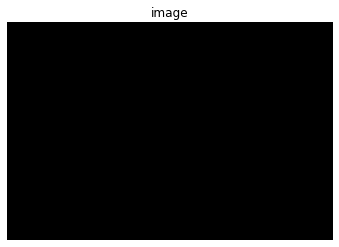

In [61]:
blank_img = np.zeros(cats.shape[:2],dtype='uint8')
show_image(blank_img)

In [62]:
cv.drawContours(blank_img,contours_blurred_edges,-1,(255,255,255),1)
display(blank_img,'contours drawn of canny',blurred_edges,'canny edges')

### thresholding to find contours
- we can use thresholding instead of canny edges to find the contours
- cv.threshold(gray image, threshold value, maximum value to be set if the pixel is above threshold, thresholding type)
    - type will be cv.THRESH_BINARY
- returns ret and thresh

In [63]:
ret, thresh = cv.threshold(gray_cats,125,255,cv.THRESH_BINARY)
contours_threshold , hierarchies = cv.findContours(thresh,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print("the number of contour(s) are {}".format(len(contours_threshold)))

the number of contour(s) are 1447


In [64]:
blank_img = np.zeros(cats.shape[:2],dtype='uint8');
cv.drawContours(blank_img,contours_threshold,-1,(255,255,255),1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [65]:
display(thresh,'threshold contours',blank_img,'contours threshold')